In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


Lets start by creating pandas dataframe.

In [23]:
df= pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
df.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
# checking dimension of dataframe
df.shape

(2935849, 6)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [26]:
# Since date is not in correct format, chanding into datetime dtype
df['date']= pd.to_datetime(df['date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [28]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [29]:
# Eliminate negative values
df.drop(df[df.item_price < 0].index, inplace = True)
df.drop(df[df.item_cnt_day < 0].index, inplace = True)

In [30]:
#checking for duplicated
df.duplicated().sum()

6

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

In [33]:
#checking null values
df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

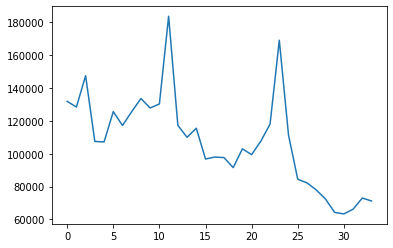

In [34]:
import matplotlib.pyplot as plt

daily_sales= df.groupby('date_block_num',as_index = False)['item_cnt_day'].sum()

plt.plot( daily_sales['date_block_num'], daily_sales['item_cnt_day'])

In [35]:
target= df['item_cnt_day']
features= df.drop(['item_cnt_day','date','item_price'],axis=1)
features.head()


,date_block_num,shop_id,item_id
0,0,59,22154
1,0,25,2552
3,0,25,2554
4,0,25,2555
5,0,25,2564


In [36]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(features,target)

LinearRegression()

In [37]:
df_test = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [38]:
#since ID is tuple containing shop and item and we have them in seperate columns so deleting them
df_test.drop(['ID'],axis=1,inplace=True)
df_test.shape

(214200, 2)

In [39]:
predictive_month = 34
df_test['date_block_num']= pd.Series(predictive_month for i in range(0,214200))




In [40]:
df_test= df_test[['date_block_num','shop_id','item_id']]
df_test.head()

,date_block_num,shop_id,item_id
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268


In [41]:
df_predicted= reg.predict(df_test)
df_predicted

array([1.29117453, 1.29309172, 1.29250234, ..., 1.32513589, 1.35149548,
       1.22495454])